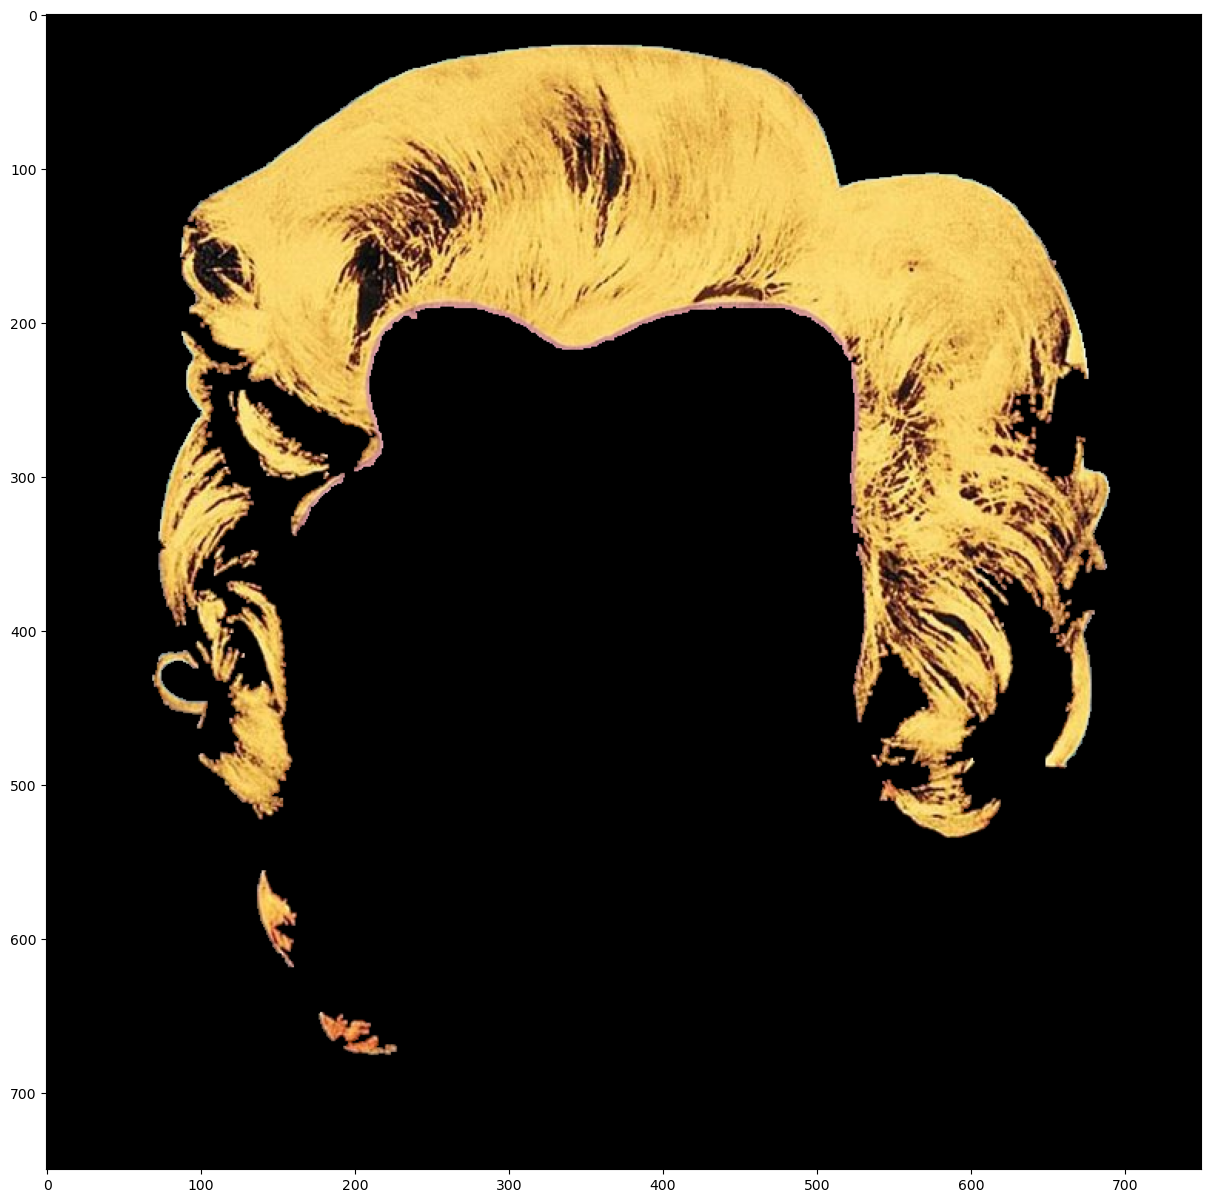

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import colorsys

# Function to convert RGB to HSV
def rgb_to_hsv(rgb):
    r, g, b = rgb[0] / 255.0, rgb[1] / 255.0, rgb[2] / 255.0
    hsv = colorsys.rgb_to_hsv(r, g, b)
    h, s, v = hsv[0] * 179, hsv[1] * 255, hsv[2] * 255
    return (h, s, v)

# Load the image
image = cv2.imread('Marilyn_blue.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Create a black image with the same dimensions as the original image
mask = np.zeros_like(image)

# Convert the ROI to HSV
hsv_roi = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

# Define the HSV range for the eyeshadow color
rgb_value = (250, 215, 111) # Color (BGR) value of the contour
hsv_value = rgb_to_hsv(rgb_value)
tolerance = 70
lower_color = np.clip([hsv_value[0] - tolerance, hsv_value[1] - tolerance, hsv_value[2] - tolerance], 0, 255)
upper_color = np.clip([hsv_value[0] + tolerance, hsv_value[1] + tolerance, hsv_value[2] + tolerance], 0, 255)

# Create a mask for the eyeshadow color
mask_eyeshadow = cv2.inRange(hsv_roi, lower_color, upper_color)

# Apply Gaussian blur to the mask
blurred_mask = cv2.GaussianBlur(mask_eyeshadow, (3, 3), 0)

# Find the contours of the eyeshadow
contours, _ = cv2.findContours(blurred_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Define the minimum contour area
min_contour_area = 300

# Create a black mask for the contour
contour_mask = np.zeros_like(image)

# Draw the contours on the mask
for contour in contours:
    if cv2.contourArea(contour) > min_contour_area:
        cv2.drawContours(contour_mask, [contour], -1, (255, 255, 255), thickness=cv2.FILLED)

# Apply the contour mask to the original image
image_inside_contour = cv2.bitwise_and(image, contour_mask)

plt.figure(figsize=(15, 15))
plt.imshow(image_inside_contour)
plt.savefig('blue_hair.png')
plt.show()

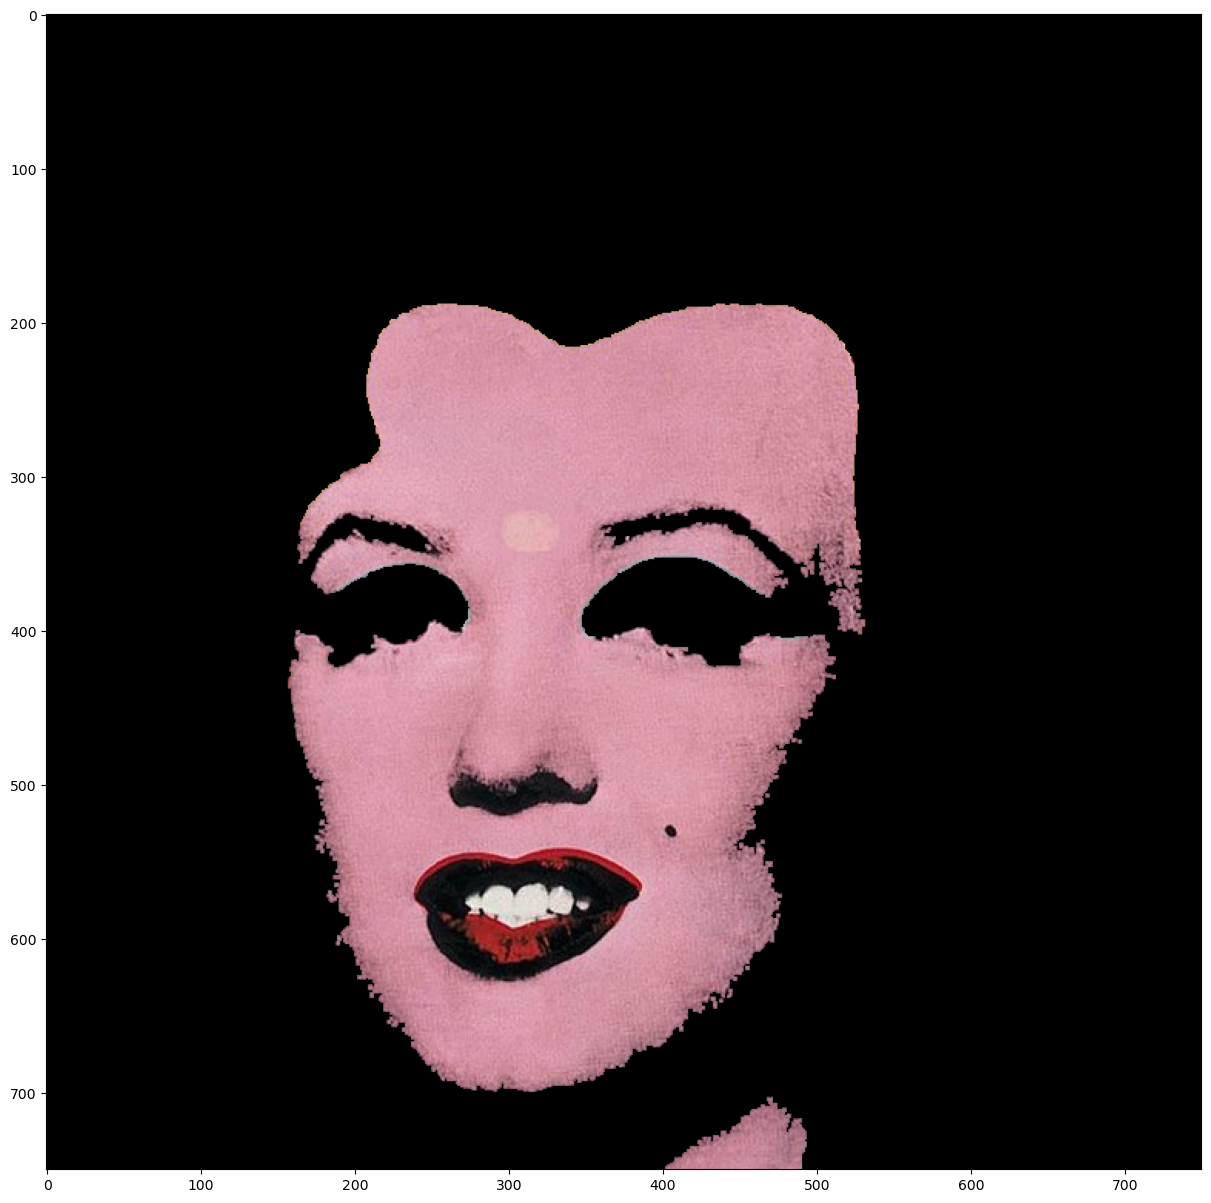

In [6]:
# Define the HSV range for the eyeshadow color
rgb_value = (216,149,168)  # Color (BGR) value of the contour
hsv_value = rgb_to_hsv(rgb_value)
tolerance = 50
lower_color = np.clip([hsv_value[0] - tolerance, hsv_value[1] - tolerance, hsv_value[2] - tolerance], 0, 255)
upper_color = np.clip([hsv_value[0] + tolerance, hsv_value[1] + tolerance, hsv_value[2] + tolerance], 0, 255)

# Create a mask for the eyeshadow color
mask_eyeshadow = cv2.inRange(hsv_roi, lower_color, upper_color)

# Apply Gaussian blur to the mask
blurred_mask = cv2.GaussianBlur(mask_eyeshadow, (3, 3), 0)

# Find the contours of the eyeshadow
contours, _ = cv2.findContours(blurred_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Define the minimum contour area
min_contour_area = 300

# Create a black mask for the contour
contour_mask = np.zeros_like(image)

# Draw the contours on the mask
for contour in contours:
    if cv2.contourArea(contour) > min_contour_area:
        cv2.drawContours(contour_mask, [contour], -1, (255, 255, 255), thickness=cv2.FILLED)

# Apply the contour mask to the original image
image_inside_contour = cv2.bitwise_and(image, contour_mask)

plt.figure(figsize=(15, 15))
plt.imshow(image_inside_contour)
plt.savefig('blue_face.png')
plt.show()

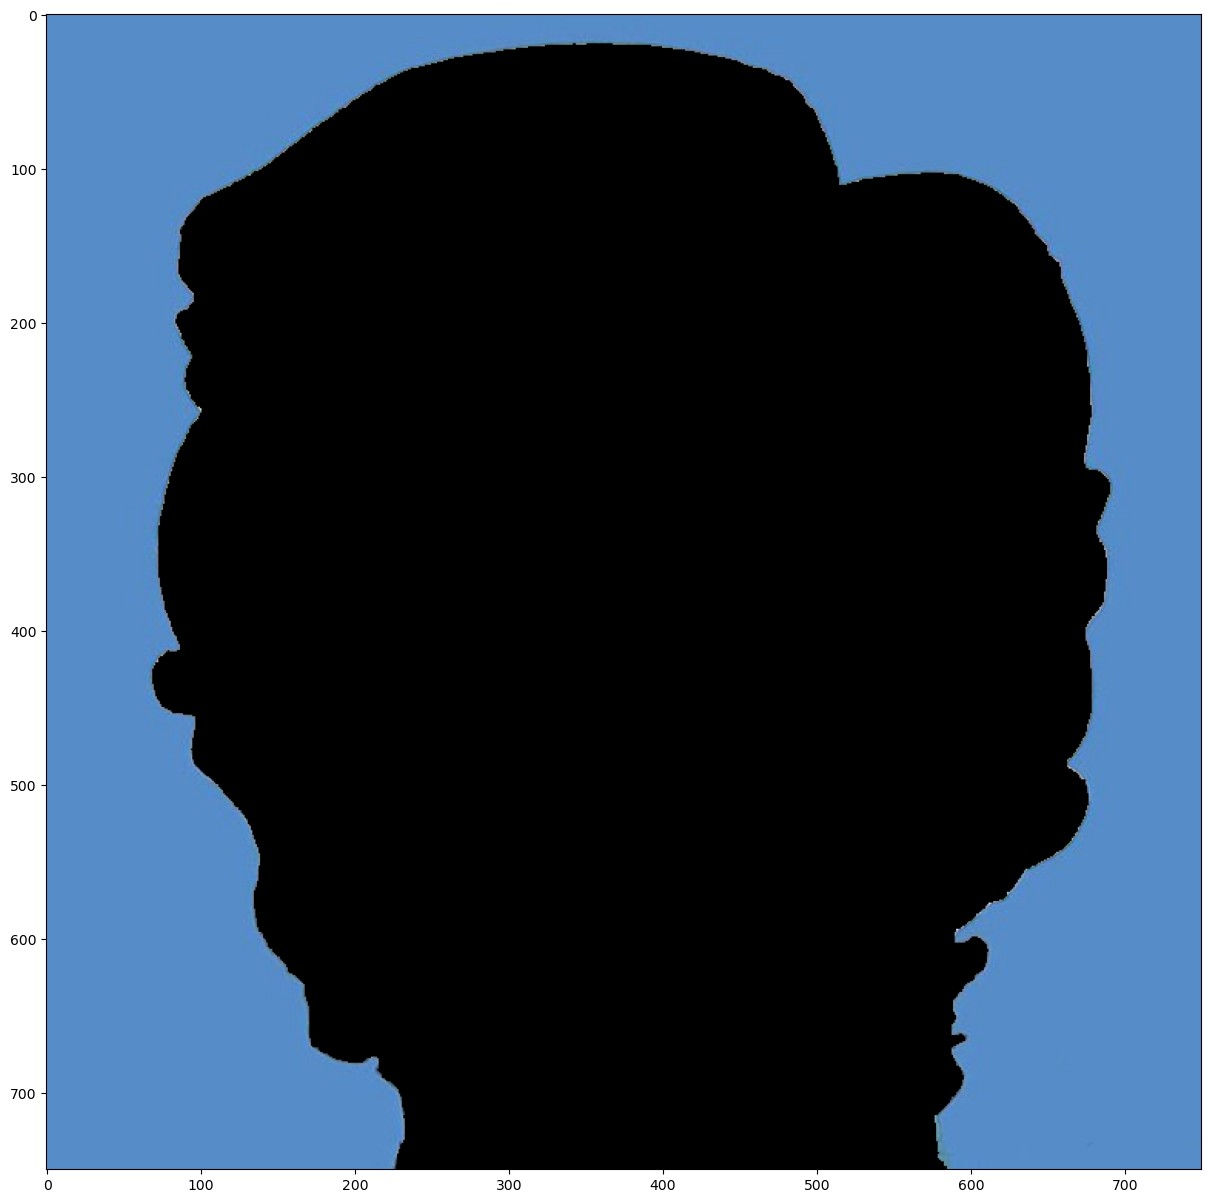

In [4]:

# Define the HSV range for the eyeshadow color
rgb_value = (86,140,200)  # Color (BGR) value of the contour
hsv_value = rgb_to_hsv(rgb_value)
tolerance = 40
lower_color = np.clip([hsv_value[0] - tolerance, hsv_value[1] - tolerance, hsv_value[2] - tolerance], 0, 255)
upper_color = np.clip([hsv_value[0] + tolerance, hsv_value[1] + tolerance, hsv_value[2] + tolerance], 0, 255)

# Create a mask for the eyeshadow color
mask_eyeshadow = cv2.inRange(hsv_roi, lower_color, upper_color)

# Apply Gaussian blur to the mask
blurred_mask = cv2.GaussianBlur(mask_eyeshadow, (3, 3), 0)

# Find the contours of the eyeshadow
contours, _ = cv2.findContours(blurred_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Define the minimum contour area
min_contour_area = 20000

# Create a black mask for the contour
contour_mask = np.zeros_like(image)

# Draw the contours on the mask
for contour in contours:
    if cv2.contourArea(contour) > min_contour_area:
        cv2.drawContours(contour_mask, [contour], -1, (255, 255, 255), thickness=cv2.FILLED)

# Apply the contour mask to the original image
image_inside_contour = cv2.bitwise_and(image, contour_mask)

plt.figure(figsize=(15, 15))
plt.imshow(image_inside_contour)
plt.show()